In [30]:
# all library for processing data
import pandas as pd # lib for pandas dataframe
import math # lib math for using math operation
import matplotlib as plt # plotting library
import numpy as np # numpy array library
from scipy.interpolate import interp1d # lib for interopolation data
from sklearn.metrics import classification_report, confusion_matrix # lib for showing classification report and confusion matrix
from sklearn.model_selection import train_test_split # lib for splitting data training and data testing
import sys # lib system information
import collections
import itertools # import iterattion tools
from scipy.stats import mode #provides abstract base classes 
from dtw import dtw
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [31]:
def show_basic_dataframe_info(dataframe):

    # Shape and how many rows and columns
    print('Number of columns in the dataframe: %i' % (dataframe.shape[1]))
    print('Number of rows in the dataframe: %i\n' % (dataframe.shape[0]))

In [32]:
import os
current_directory = os.getcwd()
data_list = []

for gesture in os.listdir(current_directory + "/GestureDataTomasV2"):
    sample_number=0
    for filename in os.listdir(current_directory + "/GestureDataTomasV2/"+ gesture):
        sample_number += 1
        with open (current_directory + "/GestureDataTomasV2/"+gesture+"/{}".format(filename), "r") as myfile:
            data=myfile.readlines()
            t = 1
            for row in data:
                row_data = eval(row)
                accX,accY,accZ = row_data[0]
                gyrX,gyrY,gyrZ = row_data[1]
                data_list.append([t,gesture, sample_number,accX,accY,accZ,gyrX,gyrY,gyrZ])
                t+=1
            
column_names = ["timestamp","label", "sample","accX","accY","accZ","gyrX","gyrY","gyrZ"]
df = pd.DataFrame(data=data_list,columns=column_names)

In [33]:
show_basic_dataframe_info(df)
df.head()

Number of columns in the dataframe: 9
Number of rows in the dataframe: 7132



,timestamp,label,sample,accX,accY,accZ,gyrX,gyrY,gyrZ
0,1,right,1,4499,15444,2349,-2,87,13
1,2,right,1,4481,15421,2380,-59,81,37
2,3,right,1,4481,15421,2380,-59,81,37
3,4,right,1,4481,15421,2380,-59,81,37
4,5,right,1,4481,15421,2380,-59,81,37


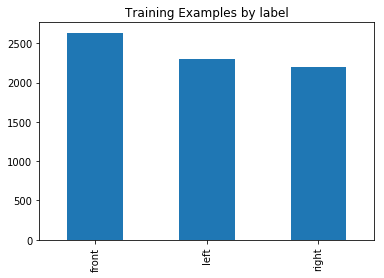

In [35]:
# Show how many training examples exist for each of the six activities
df['label'].value_counts().plot(kind='bar',
                                   title='Training Examples by label')
plt.show()

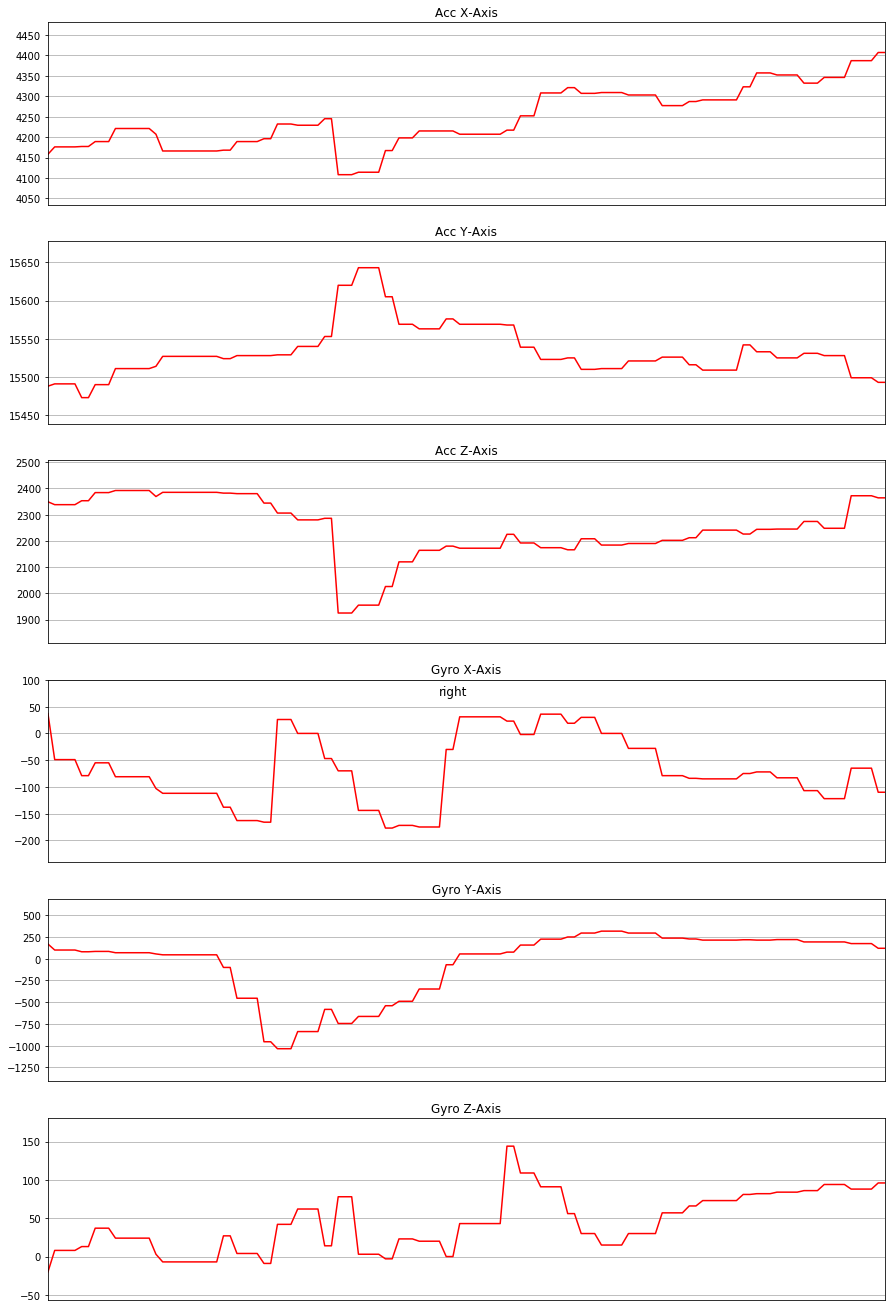

In [54]:
def plot_activity(activity, data):

    fig, (ax0, ax1, ax2,ax3, ax4, ax5) = plt.subplots(nrows=6,
         figsize=(15, 10),
         sharex=True)
    plot_axis(ax0, data['timestamp'], data['accX'], 'Acc X-Axis')
    plot_axis(ax1, data['timestamp'], data['accY'], 'Acc Y-Axis')
    plot_axis(ax2, data['timestamp'], data['accZ'], 'Acc Z-Axis')
    plot_axis(ax3, data['timestamp'], data['gyrX'], 'Gyro X-Axis')
    plot_axis(ax4, data['timestamp'], data['gyrY'], 'Gyro Y-Axis')
    plot_axis(ax5, data['timestamp'], data['gyrZ'], 'Gyro Z-Axis')
    plt.subplots_adjust(hspace=0.2)
    fig.suptitle(activity)
    plt.subplots_adjust(top=1.90)
    plt.show()

def plot_axis(ax, x, y, title):

    ax.plot(x, y, 'r')
    ax.set_title(title)
    ax.xaxis.set_visible(False)
    ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
    ax.set_xlim([min(x), max(x)])
    ax.grid(True)

for activity in np.unique(df['label']):
    if activity == "right":
        subset = df[df['label'] == activity]
        subset = subset[subset['sample'] == 2]
        plot_activity(activity, subset)